#hide
! pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

In [1]:
#hide
import fastbook
fastbook.setup_book()
from fastbook import *

Нажмите на ячейку, которая начинается со строки «# CLICK ME», чтобы выбрать ее. Первый символ в этой строке указывает, что далее следует комментарий в Python, поэтому он игнорируется при выполнении ячейки. Остальная часть клетки, хотите верьте, хотите нет, представляет собой законченную систему для создания и обучения современной модели распознавания кошек и собак. Итак, давайте тренироваться сейчас! Для этого просто нажмите Shift-Enter на клавиатуре или нажмите кнопку Play на панели инструментов. Затем подождите несколько минут, пока не произойдет следующее:

1. Набор данных под названием [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/), который содержит 7 349 изображений кошек и собак 37 различных пород, будет загружены из коллекции наборов данных fast.ai на используемый вами сервер графического процессора, а затем будут извлечены.
2. *Предварительно обученная модель*, которая уже была обучена на 1,3 миллионах изображений с использованием победившей в конкурсе модели, будет загружена из Интернета.
3. Предварительно обученная модель будет *доработана* с использованием последних достижений в области трансферного обучения, чтобы создать модель, специально настроенную для распознавания собак и кошек.

Первые два шага нужно выполнить только один раз на вашем GPU-сервере. Если вы снова запустите ячейку, она будет использовать уже загруженный набор данных и модель, а не загружать их снова. Давайте посмотрим на содержимое ячейки и результаты (<<first_training>>):

In [22]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

In [23]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [24]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [25]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.051309,0.023890,0.007442,00:41


Итак, как мы узнаем, хороша ли эта модель? В последнем столбце таблицы вы можете увидеть коэффициент ошибок, то есть долю изображений, которые были идентифицированы неправильно. Частота ошибок служит нашей метрикой — нашей мерой качества модели, выбранной как интуитивно понятная и понятная. Как видите, модель почти идеальна, хотя время обучения составило всего несколько секунд (не считая однократной загрузки набора данных и предварительно обученной модели). На самом деле, точность, которой вы уже достигли, намного лучше, чем кто-либо когда-либо достигал всего 10 лет назад!

Наконец, давайте проверим, что эта модель действительно работает. Пойди и сфотографируй собаку или кошку; если у вас его нет под рукой, просто выполните поиск в Google Images и загрузите изображение, которое вы там найдете. Теперь выполните ячейку с определенным `uploader`. Он выведет кнопку, которую вы можете нажать, чтобы вы могли выбрать изображение, которое хотите классифицировать:

Теперь вы можете передать загруженный файл модели. Убедитесь, что это четкая фотография одной собаки или кошки, а не рисунок, мультфильм или что-то подобное. Блокнот скажет вам, думает ли он, что это собака или кошка, и насколько он уверен. Надеюсь, вы обнаружите, что ваша модель отлично справилась со своей задачей:

In [26]:
#hide
# Для книги мы на самом деле не можем нажать кнопку загрузки, поэтому мы имитируем ее.
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [27]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999990


## Глубокое обучение подходит не только для классификации изображений

Эффективность глубокого обучения для классификации изображений широко обсуждалась в последние годы, и даже были показаны _сверхчеловеческие_ результаты в сложных задачах, таких как распознавание злокачественных опухолей на компьютерной томографии. Но он может сделать гораздо больше, как мы покажем здесь.

Например, давайте поговорим о том, что критически важно для автономных транспортных средств: локализация объектов на картинке. Если беспилотный автомобиль не знает, где находится пешеход, значит, он не знает, как его объехать! Создание модели, способной распознавать содержимое каждого отдельного пикселя изображения, называется *сегментацией*. Вот как мы можем обучить модель сегментации с помощью fastai, используя подмножество набора данных [*Camvid*](http://www0.cs.ucl.ac.uk/staff/G.Brostow/papers/Brostow_2009-PRL.pdf) из статьи Габрюэля Дж. Бростоу, Жюльена Фокера и Роберто Чиполлы «Семантические классы объектов в видео: база данных достоверных данных высокого разрешения»:

In [28]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)

learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.019905,2.224353,00:00


epoch,train_loss,valid_loss,time
0,1.864201,1.580963,00:00
1,1.621612,1.329687,00:00
2,1.466355,1.075313,00:00
3,1.342148,0.836263,00:00
4,1.212542,0.760115,00:00
5,1.098582,0.702379,00:00
6,1.002761,0.662043,00:00
7,0.925909,0.651533,00:00


Мы даже не будем рассматривать этот код построчно, потому что он почти идентичен нашему предыдущему примеру! (Хотя мы углубимся в модели сегментации в разделе <<chapter_arch_details>>, наряду со всеми другими моделями, которые мы кратко представляем в этой главе, и во многих других.)

Мы можем визуализировать, насколько хорошо она справилась со своей задачей, попросив модель кодировать цветом каждый пиксель изображения. Как видите, он почти идеально классифицирует каждый пиксель в каждом объекте. Например, обратите внимание, что все автомобили окрашены в один и тот же цвет, а все деревья окрашены в один и тот же цвет (в каждой паре изображений левое изображение является меткой истинности, а правое — прогнозом модели). ):

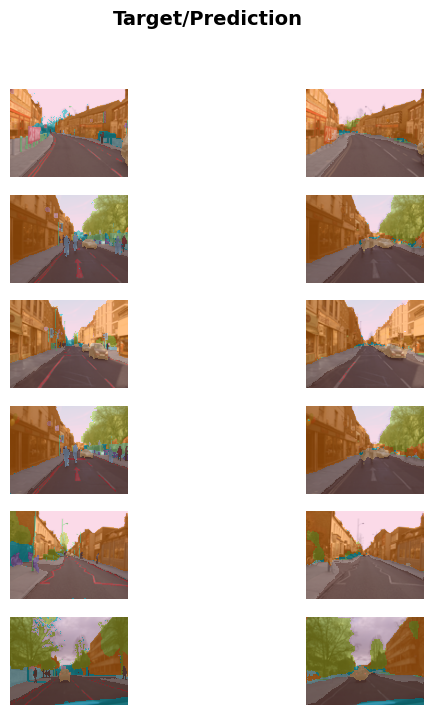

In [30]:
learn.show_results(max_n=6, figsize=(7,8))

Еще одна область, в которой глубокое обучение значительно улучшилось за последние пару лет, — это обработка естественного языка (NLP). Теперь компьютеры могут генерировать текст, автоматически переводить с одного языка на другой, анализировать комментарии, маркировать слова в предложениях и многое другое. Вот весь код, необходимый для обучения модели, которая может классифицировать настроение рецензии на фильм лучше, чем что-либо, существовавшее в мире всего пять лет назад:

In [31]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,0.465403,0.394208,0.822600,01:28


epoch,train_loss,valid_loss,accuracy,time
0,0.310650,0.255093,0.899560,01:48
1,0.247163,0.204106,0.920080,01:49
2,0.187322,0.193019,0.926560,01:52
3,0.149245,0.191151,0.927360,01:47


#clean
Если вы столкнулись с ошибкой «CUDA out of memory» после запуска этой ячейки, щелкните меню «Ядро», затем перезапустите. Вместо выполнения ячейки выше скопируйте и вставьте в нее следующий код:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

Это уменьшает размер пакета до 32 (мы объясним это позже). Если вы продолжаете сталкиваться с той же ошибкой, измените 32 на 16.

В этой модели используется ["Набор данных IMDb Large Movie Review"](https://ai.stanford.edu/~ang/papers/acl11-WordVectorsSentimentAnalysis.pdf) из статьи Эндрю Мааса "Изучение векторов слов для анализа настроений". и другие. Он хорошо работает с обзорами фильмов, состоящими из многих тысяч слов, но давайте проверим его на очень коротком, чтобы увидеть, как он работает:

In [38]:
learn.predict("Didn't like the movie")

('pos', tensor(1), tensor([0.0240, 0.9760]))

Здесь мы видим, что модель сочла отзыв положительным. Вторая часть результата — это индекс «позиции» в нашем словаре данных, а последняя часть — это вероятности, приписываемые каждому классу (99,6% для «позиции» и 0,4% для «негативности»).

Теперь твоя очередь! Напишите свой собственный мини-обзор фильма или скопируйте его из Интернета, и вы увидите, что эта модель думает об этом.

Оказывается, тоже очень похоже. Вот код, необходимый для обучения модели, которая будет предсказывать, является ли человек высокодоходным, на основе его социально-экономического положения:

In [39]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

Как вы видите, нам пришлось сообщить fastai, какие столбцы являются *категориальными* (то есть содержат значения, которые являются одним из дискретного набора вариантов, например, «оккупация»), а какие *непрерывными* (то есть содержат числовое значение). который представляет собой количество, например «возраст»).

Для этой задачи не существует предварительно обученной модели (как правило, предварительно обученные модели не являются широко доступными для каких-либо задач табличного моделирования, хотя некоторые организации создали их для внутреннего использования), поэтому в данном случае мы не используем `fine_tune`. Вместо этого мы используем `fit_one_cycle`, наиболее часто используемый метод для обучения моделей fastai *с нуля* (т.е. без трансферного обучения):

In [40]:
learn.fit_one_cycle(3)

В этой модели используется набор данных [*Adult*](http://robotics.stanford.edu/~ronnyk/nbtree.pdf) из статьи «Повышение точности наивно-байесовских классификаторов: гибрид дерева решений». Робом Кохави, который содержит некоторые демографические данные о людях (такие как их образование, семейное положение, раса, пол и наличие у них годового дохода более 50 тысяч долларов). Модель имеет точность более 80%, и ее обучение заняло около 30 секунд.

Давайте посмотрим еще на один. Системы рекомендаций очень важны, особенно в электронной коммерции. Такие компании, как Amazon и Netflix, стараются рекомендовать продукты или фильмы, которые могут понравиться пользователям. Вот как обучить модель, которая будет предсказывать фильмы, которые могут понравиться людям, на основе их предыдущих привычек просмотра, используя [набор данных MovieLens](https://doi.org/10.1145/2827872):

In [41]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.501876,1.466201,00:00


epoch,train_loss,valid_loss,time
0,1.377071,1.411240,00:00
1,1.284890,1.240451,00:00
2,1.046798,0.930646,00:00
3,0.808501,0.773686,00:00
4,0.692837,0.731240,00:00
5,0.632963,0.718099,00:00
6,0.616414,0.712920,00:00
7,0.601759,0.710596,00:00
8,0.589064,0.709298,00:00
9,0.584465,0.709216,00:00


Эта модель предсказывает рейтинги фильмов по шкале от 0,5 до 5,0 с точностью до средней ошибки около 0,6. Поскольку мы предсказываем непрерывное число, а не категорию, мы должны сообщить fastai, какой диапазон имеет наша цель, используя параметр y_range.

Хотя на самом деле мы не используем предварительно обученную модель (по той же причине, что и для табличной модели), этот пример показывает, что fastai позволяет нам в любом случае использовать `fine_tune` в этом случае (вы узнаете, как и почему это работает в <<chapter_pet_breeds>>). Иногда лучше поэкспериментировать с `fine_tune` и `fit_one_cycle`, чтобы увидеть, что лучше всего подходит для вашего набора данных.

Мы можем использовать тот же вызов `show_results`, который мы видели ранее, для просмотра нескольких примеров идентификаторов пользователей и фильмов, фактических оценок и прогнозов:

In [42]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,67.0,42.0,3.0,2.916984
1,21.0,94.0,3.0,3.148506
2,6.0,48.0,4.5,3.731507
3,5.0,85.0,5.0,3.968337
4,13.0,6.0,4.0,4.139994
5,36.0,59.0,3.0,4.341083
6,49.0,7.0,5.0,4.515327
7,86.0,19.0,3.0,2.761780
8,99.0,35.0,4.5,4.148335
